# GG3209 Assignment 2 - Magnus Burnet
### Student ID: 190011602
### GITHub Repository: https://github.com/MagnusBurnet/PY4SA23_Assignment

#### Task 1: Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric variable. Upper case text in the print statement should be replaced with the tested number.

In [10]:
num = int(input("Enter the number you want to check is divisible by 3: "))

if num%3 == 0:
    print(num,"is divisible by three")
    
else:
    print(num,"is not divisible by three")

Enter the number you want to check is divisible by 3:  45678


45678 is divisible by three


#### T2: Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced with the tested fruit.

In [23]:
fruitlist = ["apple", "orange", "pear", "kiwi", "strawberry"]

fruit = str(input("Enter the fruit you want to check: "))

if fruit in fruitlist:
            print(fruit, "is acceptable")

else:
            print(fruit, "is not accepable")


Enter the fruit you want to check:  tangerine


tangerine is not accepable


#### T3: Create a function to calculate the distance between two coordinates using the haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists.

In [5]:
import numpy as np

from math import *


#Input for coordinate1
coordinate1 = [float(x) for x in input("Enter the latitude and longitude of the first location, separated by a comma: ").split(",")]
lat1, long1 = coordinate1[0], coordinate1[1]


#Input for coordinate2
coordinate2 = [float(x) for x in input("Enter the latitude and longitude of the second location, separated by a comma: ").split(",")]
lat2, long2 = coordinate2[0], coordinate2[1]


#convert to radians
lat1, long1, lat2, long2 = np.radians([lat1, long1, lat2, long2])

#haversine formula
a = sin((lat2-lat1)/2)**2 + cos(lat1) * cos(lat2) * sin((long2-long1)/2)**2
c = 2 * atan2(sqrt(a), sqrt(1-a))
d = 6371 * c

print("The distance between your coordinates is:", d,"km")


Enter the latitude and longitude of the first location, separated by a comma:  100, 100
Enter the latitude and longitude of the second location, separated by a comma:  100, 100


The distance between your coordinates is:  0.0 km


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

ppt = pd.read_csv("portland_park_trees.csv", header=0)
ppt.columns =[column.replace(" ", "_") for column in ppt.columns]

ppt.set_index('OBJECTID', inplace=True)

ppt.to_csv("modified_portland_park_trees.csv")

ppt = pd.read_csv("modified_portland_park_trees.csv", index_col='OBJECTID')


### Numpy and Panda 
#### Question 1: How many trees are of the Quercus or Acer genus?

In [36]:
import numpy as np

Acer = 'Acer'
mask = ppt.values == Acer
Acer_count = np.count_nonzero(mask)

Quercus = 'Quercus'
mask = ppt.values == Quercus
Quercus_count = np.count_nonzero(mask)

print("There are",Acer_count, "trees with the Acer Genus and",Quercus_count, "trees with the Quercus genus")

There are 3586 trees with the Acer Genus and 2089 trees with the Quercus genus


#### Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [67]:
Genus_list = ['Quercus', 'Acer']
df1 = ppt.loc[(ppt['Genus'].isin(Genus_list)) & (ppt['DBH'] > 50), :]

num_trees = df1.shape[0]

print("There are", num_trees, "of the Quercus and Acer genuses with a DBH larger than 50 inches")

there are 124 of the Quercus and Acer genuses with a DBH higher than 50 inches


#### Q3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [ ]:

DBH_list = ['Quercus', 'Acer', 'Fraxinus']

df2 = ppt.loc[ppt['Genus'].isin(DBH_list), :]

genus_means = df2.groupby('Genus')['DBH'].mean()

highest_mean = genus_means.idxmax()

print("The genus with the highest mean DBH is", highest_mean)


#### Q4: How many different species of trees are recorded in the Acer genus?

In [71]:
df3 = ppt.loc[ppt['Genus'] == 'Acer', :]
Num_Species = len(df3['Species'].unique())

print("There are", Num_Species, "of species in the Acer genus")


There are 20 of species in the Acer genus


#### Q5:
#### • Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.
#### • Remove the original "pop" column.
#### • Choose/subset a city that starts with the same letter as your first name (for example,
#### "Mexico City" if your first name is Michael).
#### • Subset the five biggest (i.e., largest population sizes) cities from the country where your
#### selected city is.
#### • Print the result.
#### • Make sure you write the scripts in different code cells where you describe the process.

In [88]:
#import world_cities as wc
wc = pd.read_csv("world_cities.csv", header=0)
wc.columns =[column.replace(" ", "_") for column in wc.columns]
wc.tail

#calculate new column of population in millions

wc['pop_M'] = wc['pop']/1000000
wc.shape


(43645, 7)

In [89]:
#removing the original "pop" column

wc = wc.drop('pop', axis=1)
wc.head

<bound method NDFrame.head of                      city       country    lat    lon  capital     pop_M
0      'Abasan al-Jadidah     Palestine  31.31  34.34        0  0.005629
1      'Abasan al-Kabirah     Palestine  31.32  34.35        0  0.018999
2            'Abdul Hakim      Pakistan  30.55  72.11        0  0.047788
3      'Abdullah-as-Salam        Kuwait  29.36  47.98        0  0.021817
4                   'Abud     Palestine  32.03  35.07        0  0.002456
...                   ...           ...    ...    ...      ...       ...
43640           az-Zubayr          Iraq  30.39  47.71        0  0.124611
43641            az-Zulfi  Saudi Arabia  26.30  44.80        0  0.054070
43642       az-Zuwaytinah         Libya  30.95  20.12        0  0.021984
43643        s-Gravenhage   Netherlands  52.07   4.30        0  0.479525
43644     s-Hertogenbosch   Netherlands  51.68   5.30        0  0.135529

[43645 rows x 6 columns]>

In [ ]:
#working with subset 'm'

import os

starts_M = wc.loc[wc['city'].str.startswith('M'), 'city'].tolist()

#print(starts_M)

#chosen - Mount Elgon

wc.query('city == "Nairobi"')

list_of_kenyan_counties = wc.loc[wc['country'] == 'Kenya', :]


top_5_cities = list_of_kenyan_counties.sort_values(by='pop_M', ascending=False).head(5)
print(top_5_cities)


#### Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and “TreeHeight” attributes.).

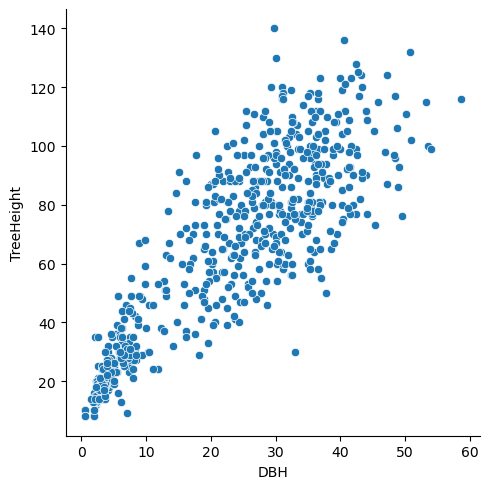

In [156]:

import seaborn as sns

Ulmus_genus = ppt.loc[ppt['Genus'] == 'Ulmus', :]


sns.relplot(x="DBH", y="TreeHeight", data=Ulmus_genus)



#### G2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)


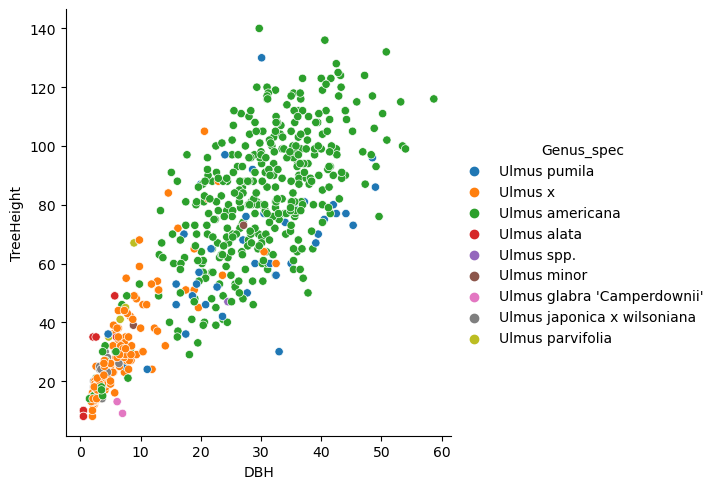

In [135]:
sns.relplot(x="DBH", y="TreeHeight", hue="Genus_spec", data=Ulmus_genus)

#### G3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot).

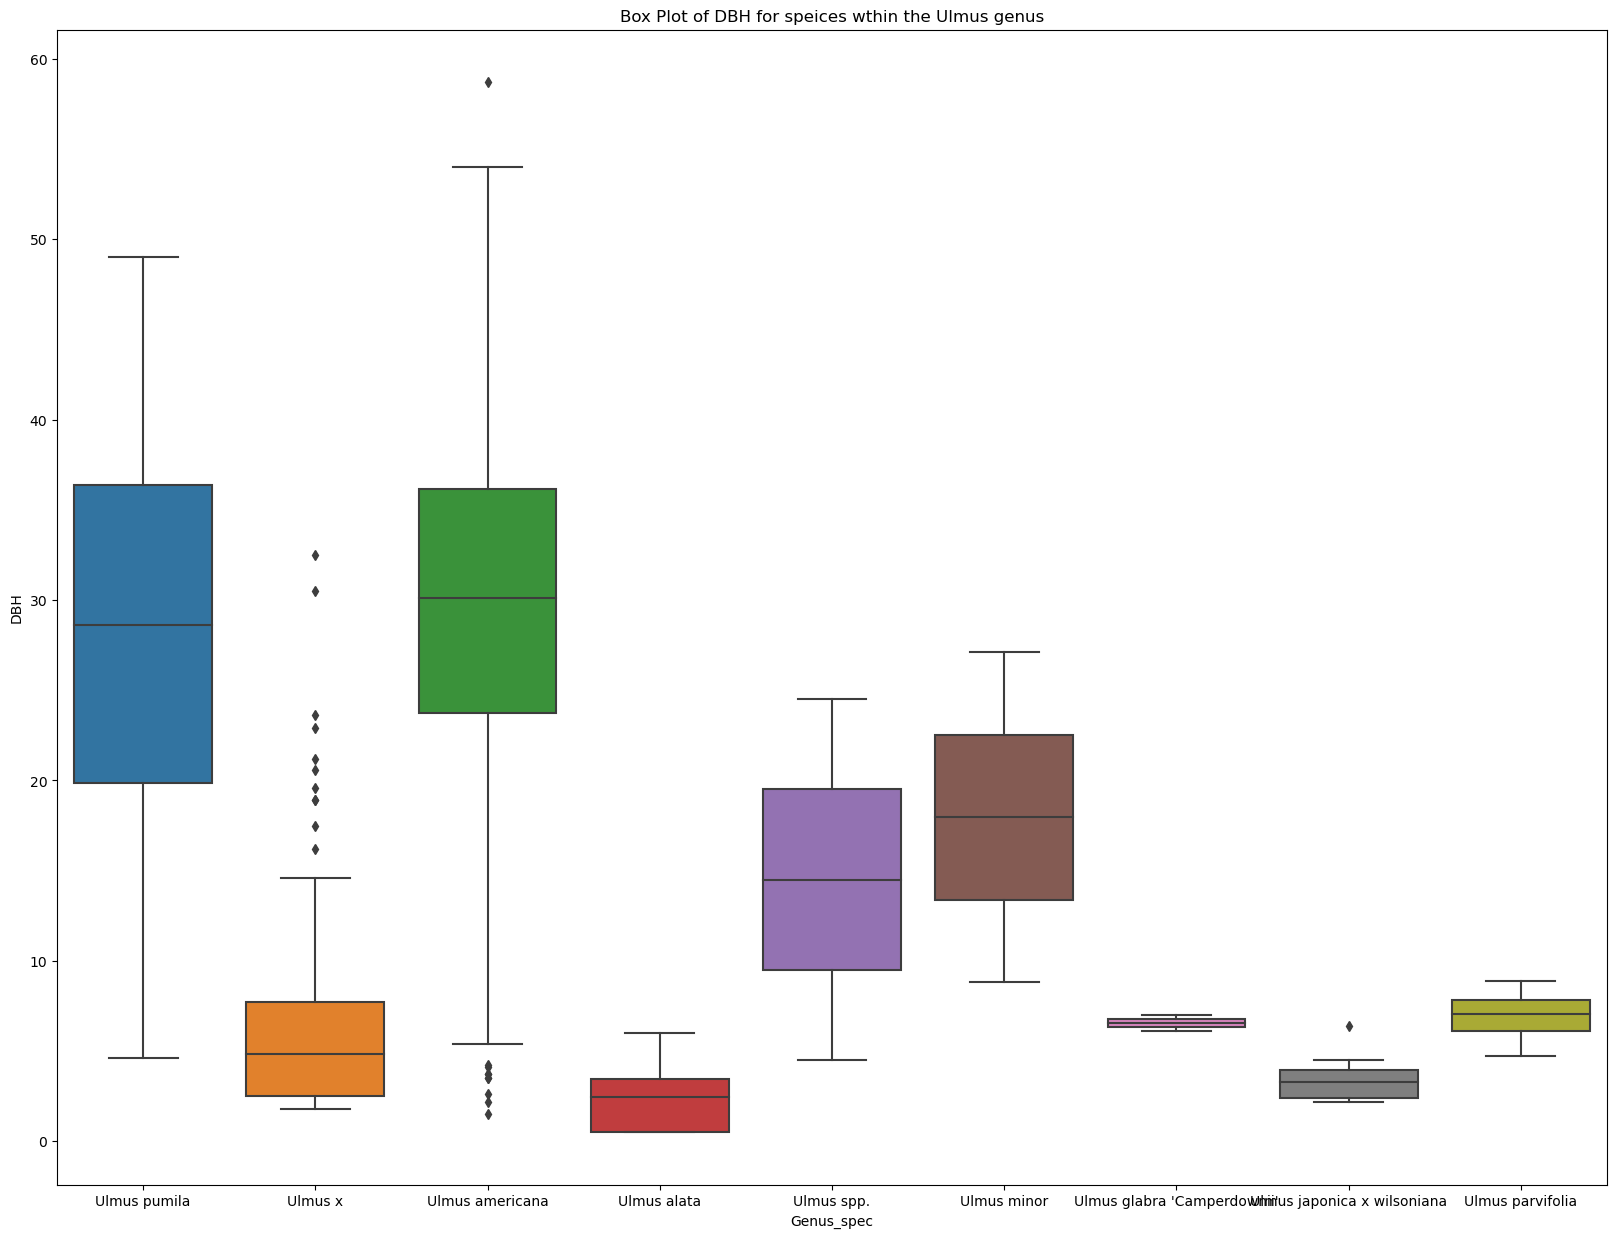

In [141]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=Ulmus_genus, x='Genus_spec', y='DBH')
plt.title('Box Plot of DBH for speices wthin the Ulmus genus')
plt.show()

#### G4: Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs.

TypeError: boxplot() got an unexpected keyword argument 'y'

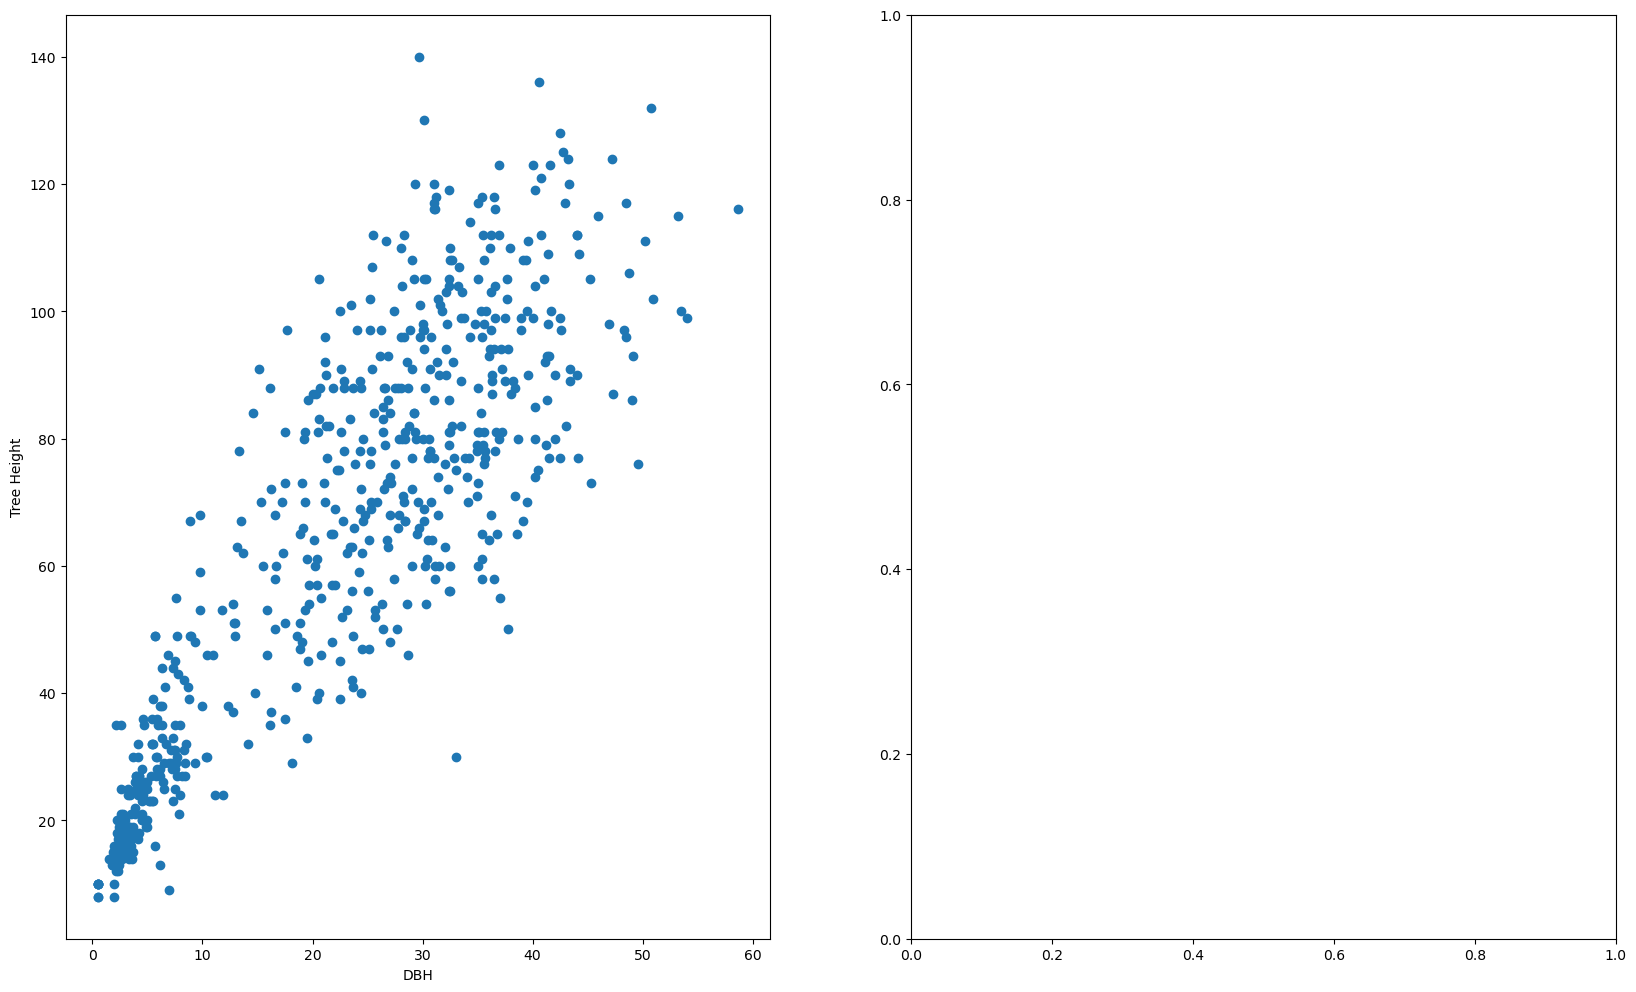

In [160]:
import matplotlib.pyplot as plt


plt.subplot(1, 2, 1)
plt.scatter(x=Ulmus_genus["DBH"], y=Ulmus_genus["TreeHeight"])
plt.xlabel("DBH")
plt.ylabel("Tree Height")


plt.subplot(1, 2, 2)
plt.boxplot(data=Ulmus_genus, x='Genus_spec', y='DBH')
plt.title('Box Plot of DBH for speices wthin the Ulmus genus')

plt.show()